In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\lenovo ssd\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_csv('../Data/RSCCASN.csv',index_col='DATE',parse_dates=True)

In [5]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [6]:
df.columns = ['sales']

In [7]:
df.head()

,sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


<Axes: xlabel='DATE'>

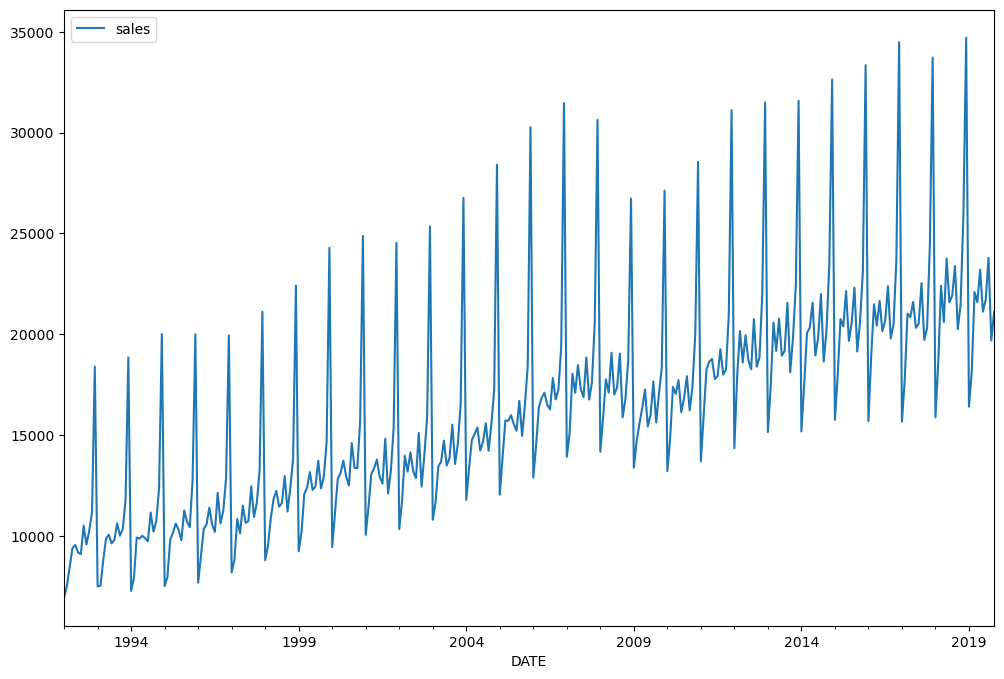

In [8]:
df.plot(figsize=(12,8))

In [9]:
len(df)

334

In [10]:
len(df)-18

316

In [11]:
test_size = 18


In [12]:
test_ind = len(df)-test_size

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind :]

In [14]:
train

,sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [15]:
test

,sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler= MinMaxScaler()

In [21]:
scaler.fit(train)

MinMaxScaler()

In [22]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)


In [25]:
X,y = generator[0]

In [26]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [28]:
n_features =1

In [31]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length , n_features), return_sequences=True))
model.add(LSTM(100,activation='relu'))
model.add(Dense(1))
model.compile(optimizer ='adam',loss='mse')

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 12, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.fit(generator ,epochs=20)

Epoch 1/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0027
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0017
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0011
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0014
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0017
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0020
Epoch 7/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 7.5873e-04
Epoch 8/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0011
Epoch 9/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0013
Epoch 10/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0014
Epoch 11/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0015
Epoch 12/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0012
Epoch 13/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0016
Epoch 14/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0012
Epoch 15/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/s

In [35]:
losses =pd.DataFrame(model.history.history)

In [36]:
losses

,loss
0,0.002264
1,0.001332
2,0.001294
3,0.001499
4,0.001445
5,0.001717
6,0.001099
7,0.001480
8,0.001231
9,0.001597


<Axes: >

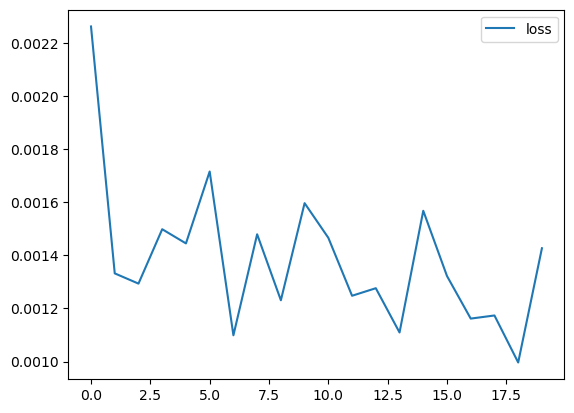

In [37]:
losses.plot()

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor = 'val_loss',patience= 2)


In [40]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length = length ,batch_size=1)

In [52]:
# fit model
model.fit(generator,epochs=20,
                    validation_data=validation_generator
                   )

Epoch 1/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0013 - val_loss: 5.2060e-04
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.7406e-04 - val_loss: 0.0020
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8.5271e-04 - val_loss: 0.0019
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.8259e-04 - val_loss: 0.0039
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8.9959e-04 - val_loss: 2.5482e-04
Epoch 7/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.4157e-04 - val_loss: 0.0013
Epoch 8/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7.1076e-04 - val_loss: 5.0445e-04
Epoch 9/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.5032e-04 - val_loss: 0.0030
Epoch 10/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 11/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8.4213e-04 - val_loss: 0.0013
Epoch 12

In [53]:
loss = pd.DataFrame(model.history.history)

<Axes: >

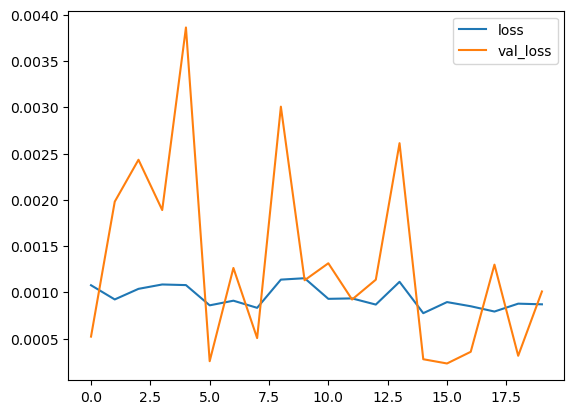

In [54]:
loss.plot()

In [55]:
first_eval_batch = scaled_train[-length:]

In [56]:
first_eval_batch

array([[0.53252977],
       [0.48591345],
       [0.49364653],
       [0.56629393],
       [0.46405751],
       [0.48536886],
       [0.63534708],
       [0.97233517],
       [0.32468051],
       [0.42285071],
       [0.5615016 ],
       [0.49658728]])

In [57]:
first_eval_batch = first_eval_batch.reshape(1,length,n_features)

In [58]:
first_eval_batch

array([[[0.53252977],
        [0.48591345],
        [0.49364653],
        [0.56629393],
        [0.46405751],
        [0.48536886],
        [0.63534708],
        [0.97233517],
        [0.32468051],
        [0.42285071],
        [0.5615016 ],
        [0.49658728]]])

In [59]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.55394673]], dtype=float32)

In [60]:
scaled_test[0]

array([0.61087714])

In [61]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [62]:
true_predictions = scaler.inverse_transform(test_predictions)

In [63]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\lenovo ssd\AppData\Local\Temp\ipykernel_14612\1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [64]:
test

,sales,Predictions
DATE,,
2018-05-01,23764,22195.908827
2018-06-01,21589,21036.913536
2018-07-01,21919,21194.560970
2018-08-01,23381,22977.672576
2018-09-01,20260,20190.400795
2018-10-01,21473,20888.069167
2018-11-01,25831,25178.511138
2018-12-01,34706,34228.384050
2019-01-01,16410,16394.331713


<Axes: xlabel='DATE'>

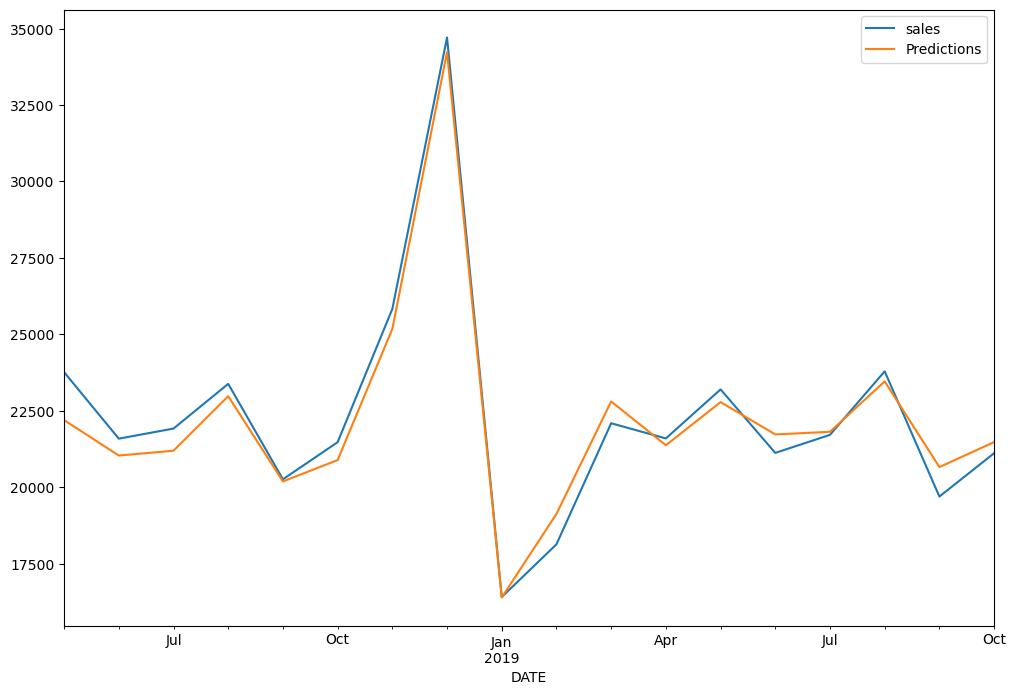

In [65]:
test.plot(figsize=(12,8))

In [66]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [92]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [70]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features),return_sequences = True))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit(generator,epochs=10)

Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0422
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0197
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0140
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0057
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0022
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0022
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0015
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0018
Epoch 9/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0014
Epoch 10/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0015


In [71]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [72]:
forecast = scaler.inverse_transform(forecast)

In [73]:
df

,sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [74]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [75]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [76]:
forecast_df

,Forecast
2019-11-01,24576.673375
2019-12-01,31322.041041
2020-01-01,17856.240613
2020-02-01,19151.218801
2020-03-01,21815.919145
2020-04-01,21503.735393
2020-05-01,22551.874776
2020-06-01,21180.226848
2020-07-01,21583.719828
2020-08-01,22989.044981


<Axes: >

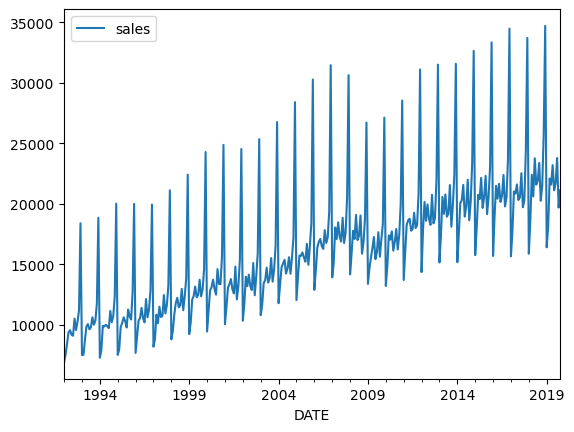

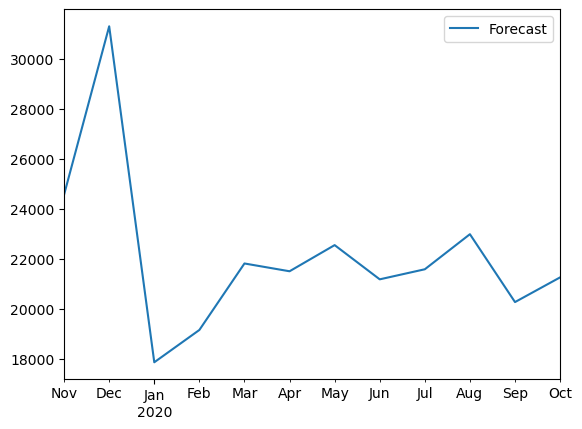

In [77]:
df.plot()
forecast_df.plot()

<Axes: xlabel='DATE'>

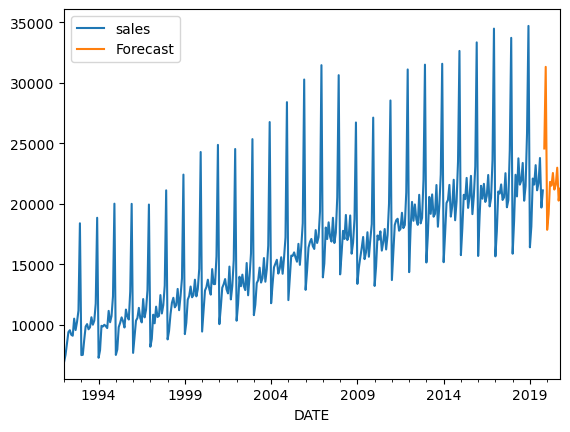

In [78]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576.0, 611.0)

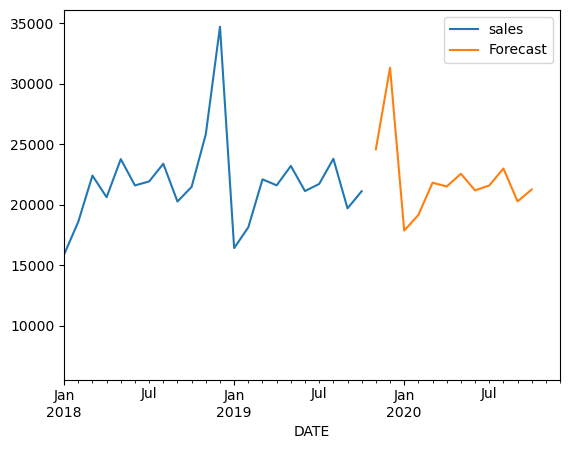

In [79]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')